In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

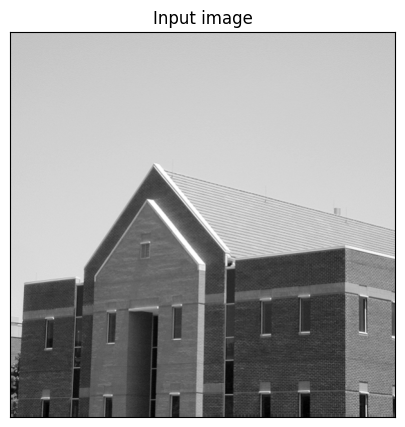

In [ ]:
img = cv2.imread("building.tif")

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.title("Input image")
plt.xticks([]), plt.yticks([])
plt.show()

## Realizar filtragem usando máscara de Sobel na direção vertical para encontrar gv. Mostrar a imagem

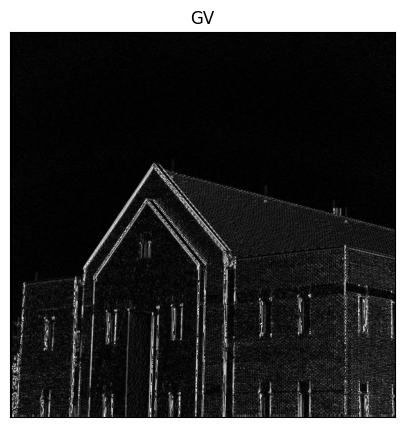

In [ ]:
sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]
                   )

gv = cv2.filter2D(img, cv2.CV_64F, sobel_y)
gv_abs = np.abs(gv).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.imshow(gv_abs)
plt.title("GV")
plt.xticks([]), plt.yticks([])
plt.show()

## Realizar filtragem usando máscara de Sobel na direção horizontal para encontrar gh. Mostrar a imagem.

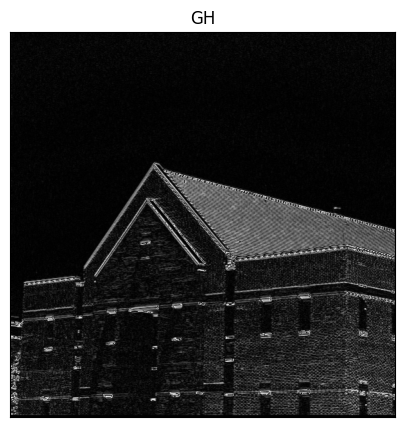

In [ ]:
sobel_x = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]]
                   )

gh = cv2.filter2D(img, cv2.CV_64F, sobel_x)
gh_abs = np.abs(gh).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.imshow(gh_abs)
plt.title("GH")
plt.xticks([]), plt.yticks([])
plt.show()

## Calcular a magnitude do gradiente g, combinando os valores absolutos de gv e gh. Mostrar o resultado

[[[ 0  0  0]
  [ 0  0  0]
  [ 6  6  6]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 0  0  0]]

 [[12 12 12]
  [12 12 12]
  [18 18 18]
  ...
  [ 4  4  4]
  [12 12 12]
  [12 12 12]]

 [[ 4  4  4]
  [ 4  4  4]
  [10 10 10]
  ...
  [14 14 14]
  [10 10 10]
  [ 6  6  6]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [10 10 10]
  [62 62 62]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 8  8  8]
  [60 60 60]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 8  8  8]
  [60 60 60]
  [ 0  0  0]]]


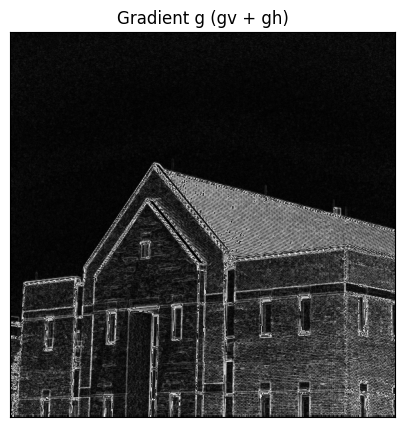

In [ ]:
gradient_mag = (gh_abs + gv_abs).astype(np.uint8)

print(gradient_mag)

plt.figure(figsize=(10,5))
plt.imshow(gradient_mag)
plt.title("Gradient g (gv + gh)")
plt.xticks([]), plt.yticks([])
plt.show()

##  Calcular a direção do gradiente alpha, e mostrar o resultado.

[[[  0   0   0]
  [  0   0   0]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [254 254 254]
  [  3   3   3]]

 [[  3   3   3]
  [  3   3   3]
  [254 254 254]
  ...
  [  2   2   2]
  [254 254 254]
  [  3   3   3]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [  1   1   1]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [  1   1   1]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [  1   1   1]
  [  0   0   0]]]


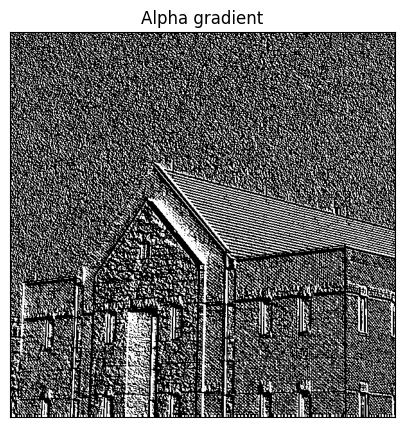

In [ ]:
alpha = np.arctan2(gv, gh).astype(np.uint8)
print(alpha)


normalized = cv2.normalize(alpha, np.zeros((800, 800)), 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(10,5))
plt.imshow(alpha)
plt.title("Alpha gradient")
plt.xticks([]), plt.yticks([])
plt.show()

## Limiarizar a magnitude do gradiente para encontrar as bordas da imagem, escolha um valor adequado para um limiar global. Mostre o resultado contendo as bordas.

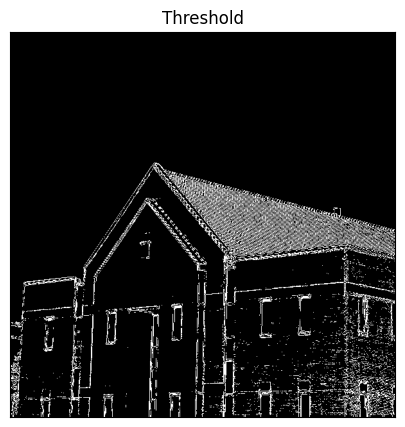

In [ ]:
global_threshold = 0.50
_, img_threshold = cv2.threshold(gradient_mag, gradient_mag.max() * global_threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.imshow(img_threshold)
plt.title("Threshold")
plt.xticks([]), plt.yticks([])
plt.show()

## Filtrar a imagem original usando o Laplaciano para detectar bordas.

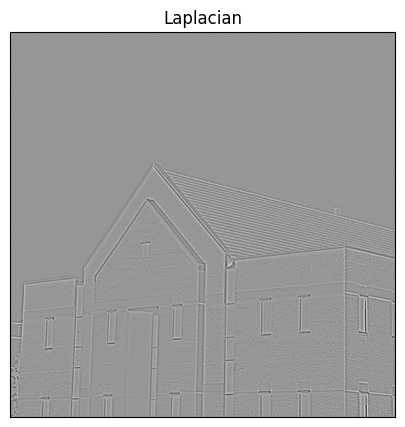

In [ ]:
img_filtered = cv2.GaussianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (3, 3), 0)

laplacian = cv2.Laplacian(img_filtered,cv2.CV_64F)

plt.figure(figsize=(10,5))
plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian")
plt.xticks([]), plt.yticks([])
plt.show()